# Global Energy

## Introduction

In this project we will address a common problem: **missing data**. We will start from a global energy consumption dataset containing a variable with several missing values and we will build a **linear regression** model that will exploit the known values (of another variable) to predict the null ones.

![](https://raw.githubusercontent.com/boolean-data-analytics/img/main/on-demand/DAREG-global-energy.jpeg)

**[linear regression](https://realpython.com/linear-regression-in-python/)** is one of the best known statistical learning techniques and is therefore the perfect springboard to enter the vast and exciting world of machine learning.

The most common goal in statistics and, more generally, in data science, is to **predict**, i.e. use the `data` available to build a `model` (which is a simplified representation of the reality) that allows us to make a `prediction` about a future or not yet observed event.

> *It may seem like an abstract concept, but it's what we do every day before leaving home:*
1. let's look out the window and see if the sky is overcast > `data`
2. we compare the observed sky with our past experience > `model`
3. let's evaluate whether it is likely to rain > `forecast`

> in general the most common goal of data science is to predict something from data, creating a model (simplification of reality) and a future or missing value.

## Dataset

First we load all the **libraries** that we will need in the analysis.

In [4]:
#--------------------
# Basic libraries for data analysis
import numpy as np
import pandas as pd

#--------------------
# Data Visualization
import seaborn as sns

sns.set_theme()
sns.set(rc={'figure.figsize':(11,7)})

from matplotlib import pyplot as plt

#--------------------
# One of the most popular data science libraries
from sklearn.linear_model import LinearRegression


We will work with a dataset containing annual data (from 2000 to 2012) related to socio-economic indicators (such as GDP, CO2 emissions, energy consumption, life expectancy, etc.) from over 200 countries around the world.

Let's load the dataset and take a first look at it:

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/boolean-data-analytics/data/main/World%20Indicators%20S.csv')
df

,Country/Region,Region,Year,Population Total,GDP,CO2 Emissions,Energy Usage,Life Expectancy,Infant Mortality Rate
0,Algeria,Africa,01/12/2000,31719449,5.479006e+10,87931.0,26998.0,69.0,0.034
1,Angola,Africa,01/12/2000,13924930,9.129595e+09,9542.0,7499.0,45.5,0.128
2,Benin,Africa,01/12/2000,6949366,2.359122e+09,1617.0,1983.0,55.0,0.090
3,Botswana,Africa,01/12/2000,1755375,5.788312e+09,4276.0,1836.0,50.5,0.054
4,Burkina Faso,Africa,01/12/2000,11607944,2.610959e+09,1041.0,NaN,50.5,0.096
...,...,...,...,...,...,...,...,...,...
2686,Belize,The Americas,01/12/2012,324060,1.572500e+09,NaN,NaN,74.0,0.015
2687,Haiti,The Americas,01/12/2012,10173775,7.890217e+09,NaN,NaN,63.0,0.056
2688,Bolivia,The Americas,01/12/2012,10496285,2.703511e+10,NaN,NaN,67.0,0.032
2689,Honduras,The Americas,01/12/2012,7935846,1.856426e+10,NaN,NaN,73.5,0.020


GDP = Gross domestic product

## Preliminary analysis

We use the `.info()` method to explore the variables included in the DataFrame and any missing values:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2691 entries, 0 to 2690
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country/Region         2691 non-null   object 
 1   Region                 2691 non-null   object 
 2   Year                   2691 non-null   object 
 3   Population Total       2691 non-null   int64  
 4   GDP                    2494 non-null   float64
 5   CO2 Emissions          2125 non-null   float64
 6   Energy Usage           1785 non-null   float64
 7   Life Expectancy        2555 non-null   float64
 8   Infant Mortality Rate  2444 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 189.3+ KB


The first three variables are strings (object), the fourth is composed of integer values (int) and the other five are composed of real values (float).

We note that most of the numeric variables (except for `Population Total`), contain missing values, in particular `Energy Usage` is **the variable with the highest number of null values** (1785 out of 2691, about 66%) and therefore lends itself as an excellent candidate for our linear regression exercise.

## Missing values

When we encounter missing values, there are actually three things we can do to address the problem:

* leave the missing value where it is
* delete the remark (i.e. the whole line) - Only when multiple records (information) on multiple variables are missing.
* **insert another value in place of the null one**

This last option can be addressed by following different paths:

* enter a predetermined value (for example 0)
* enter a global average value (for example the average of the variable)
* enter the average value of the last "n" observations (in case there is a time link between the observations of the variable)
* interpolation of the data
* **regression**

We will focus on the latter technique, which is certainly the most complex but also the most interesting and is the basis of statistical learning algorithms (machine learning).

## Relationship between variables

From what we said above, our goal will be to predict the missing values of the variable `Energy Usage` using the other data available to us.

>✨ In order to use one variable to predict another, there must be a strong relationship (**correlation**) between these two.

One way to graphically verify the existence of a relationship between two variables is with a scatterplot (or **scatterplot**); let's see for example the relationship between `Energy Usage` ([measured](https://databank.worldbank.org/metadataglossary/world-development-indicators/series/EG.USE.PCAP.KG.OE) in thousands of tons) and `CO2 Emissions` ([measured](https://databank.worldbank.org/metadataglossary/millennium-development-goals/series/EN.ATM.CO2E.KT) in kilotons):

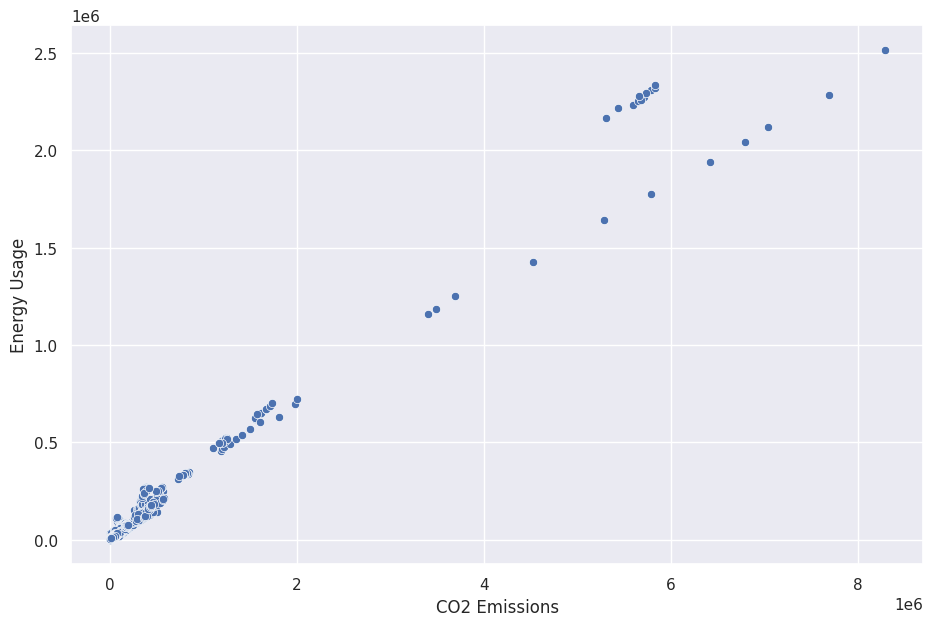

In [13]:
sns.scatterplot(data=df, x='CO2 Emissions', y='Energy Usage')
plt.show() # delete the string: <Axes: xlabel='CO2 Emissions', ylabel='Energy Usage'>

From the scatterplot we see that there is a **strong direct linear relationship** between the two variables, in fact we note that as one increases, the other also increases proportionally. We could therefore think of **building a model** (actually an equation) which, given one variable, is able to predict the second.

## Distribution of null values

Let's look at the distribution of null values between the two variables, using the `.isna()` and `.notna()` methods:

In [14]:
df['CO2 Emissions'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2686     True
2687     True
2688     True
2689     True
2690     True
Name: CO2 Emissions, Length: 2691, dtype: bool

`isna()` returns a boolean vector True False

Slicing is now applied to obtain the cases where the vector has only True values:

In [15]:
df[df['CO2 Emissions'].isna()].shape[0]

566

There are 566 missing values in the 'CO2 Emissions' column

> `.shape()` it is used to select the number of rows.

We want to check where both the variables `CO2 Emissions `and  `Energy Usage`  are null, we use the boolean operator AND (&):
> `df[ (1st condiction) & (2nd condiction) ]`

In [16]:
df[df['CO2 Emissions'].isna() & df['Energy Usage'].isna()].shape[0]

376

There are 376 observations in which both variables have null values.

Now it is good to visualize all the combinations between the two variables relative to the null values:

* Both have null values `df['CO2 Emissions'].isna() & df['Energy Usage'].isna()`
* Only 'CO2 Emissions' has null values `df['CO2 Emissions'].notna()`
* Only 'Energy Usage' has null values `df['Energy Usage'].notna()`
* Both have no null values `df['CO2 Emissions'].notna() & df['Energy Usage'].notna()`

In [17]:
print(f"Both have null values: {df[df['CO2 Emissions'].isna() & df['Energy Usage'].isna()].shape[0]}")
print(f"Only 'CO2 Emissions' has null values: {df[df['CO2 Emissions'].isna() & df['Energy Usage'].notna()].shape[0]}")
print(f"Only 'Energy Usage' has null values: {df[df['CO2 Emissions'].notna() & df['Energy Usage'].isna()].shape[0]}")
print(f"Both have no null values: {df[df['CO2 Emissions'].notna() & df['Energy Usage'].notna()].shape[0]}")

Both have null values: 376
Only 'CO2 Emissions' has null values: 190
Only 'Energy Usage' has null values: 530
Both have no null values: 1595


To represent the null value information above in a double-entry table.

In [18]:
co2_nrg_00 = df[df['CO2 Emissions'].isna() & df['Energy Usage'].isna()].shape[0]
co2_nrg_10 = df[df['CO2 Emissions'].notna() & df['Energy Usage'].isna()].shape[0]
co2_nrg_01 = df[df['CO2 Emissions'].isna() & df['Energy Usage'].notna()].shape[0]
co2_nrg_11 = df[df['CO2 Emissions'].notna() & df['Energy Usage'].notna()].shape[0]
pd.DataFrame([[co2_nrg_00, co2_nrg_10],
              [co2_nrg_01, co2_nrg_11]],
    columns=[['CO2', 'CO2'],
             ['null','not-null']],
    index=[['Energy', 'Energy'],
           ['null','not-null']]
)

CO2         
                null not-null
Energy null      376      530
       not-null  190     1595

-----------------------------------------------------------------------------

> ⭐🚀 Experiment

In [19]:
from tabulate import tabulate

columns_to_check = ['CO2 Emissions', 'Energy Usage']

table_data = []
header = ['Columns', 'Status', 'Count']

for column1 in columns_to_check:
    for column2 in columns_to_check:
        if column1 == 'CO2 Emissions' and column2 == 'Energy Usage':
            status = 'Both'
            count = df[df[column1].isna() & df[column2].isna()].shape[0]
        elif column1 == 'CO2 Emissions':
            status = 'Only Energy Usage'
            count = df[df[column1].isna() & df[column2].notna()].shape[0]
        elif column2 == 'Energy Usage':
            status = 'Only CO2 Emissions'
            count = df[df[column1].notna() & df[column2].isna()].shape[0]
        else:
            status = 'Both not null'
            count = df[df[column1].notna() & df[column2].notna()].shape[0]

        table_data.append([column1, column2, status, count])

table = tabulate(table_data, headers=header, tablefmt="grid")
print(table)


+---------------+---------------+--------------------+---------+
|               | Columns       | Status             |   Count |
+===============+===============+====================+=========+
| CO2 Emissions | CO2 Emissions | Only Energy Usage  |       0 |
+---------------+---------------+--------------------+---------+
| CO2 Emissions | Energy Usage  | Both               |     376 |
+---------------+---------------+--------------------+---------+
| Energy Usage  | CO2 Emissions | Both not null      |    1595 |
+---------------+---------------+--------------------+---------+
| Energy Usage  | Energy Usage  | Only CO2 Emissions |       0 |
+---------------+---------------+--------------------+---------+


-----------------------------------------------------------------------------

From the mirror that we have built above, we note that there are:
- 1595 observations in which the value of both variables is available;
- 530 observations in which the value of `Energy Usage` is not there, but that of `CO2 Emissions` is.

> The goal is to build a **regression model** using the 1595 observations available for both variables and then use this model to **predict** the missing values of `Energy Usage` with the 530 **data* * available of `CO2 Emissions`.

We create a new dataframe where, thanks to the `.dropna()` method, we remove all the rows that have even just one missing value; in this way we obtain the following dataset which does not contain null values and with which we will estimate a linear regression model:

In [21]:
df_reg = df[['Country/Region', 'Region', 'Year', 'CO2 Emissions', 'Energy Usage']].dropna(how='any')
df_reg

,Country/Region,Region,Year,CO2 Emissions,Energy Usage
0,Algeria,Africa,01/12/2000,87931.0,26998.0
1,Angola,Africa,01/12/2000,9542.0,7499.0
2,Benin,Africa,01/12/2000,1617.0,1983.0
3,Botswana,Africa,01/12/2000,4276.0,1836.0
6,Cameroon,Africa,01/12/2000,3432.0,6310.0
...,...,...,...,...,...
2598,Nicaragua,The Americas,01/12/2010,4547.0,2951.0
2599,Bolivia,The Americas,01/12/2010,15456.0,7341.0
2600,Haiti,The Americas,01/12/2010,2120.0,2409.0
2601,Honduras,The Americas,01/12/2010,8108.0,4567.0


## Linear Regression

As already mentioned, **linear regression** is a technique widely used in statistics and data science which allows the use of one or more variables (called independent variables or `regressors`) to predict the value of another variable of interest (called the dependent variable or `target`).

To do this it is necessary to build a mathematical **model**, specifically it will be necessary to *find an equation that approximates in the best possible way the relationship* that exists between the regressors and the target variable. In fact, we recall that:

> model = approximation of reality

### A simple example

But let's see immediately a **practical example**. The following dataframe contains fictitious data on the weight and height measurements of 10 people:

In [22]:
data = pd.DataFrame(data = {'height':[175, 170, 172, 185, 165, 183, 182, 191, 178, 162],
                            'weight':[68, 65, 63, 86, 60, 70, 80, 89, 74, 64]})
data

,height,weight
0,175,68
1,170,65
2,172,63
3,185,86
4,165,60
5,183,70
6,182,80
7,191,89
8,178,74
9,162,64


If we plot these two variables with a scatterplot, we notice that each observation appears to be aligned on a hypothetical straight line that runs from the bottom left corner through the point cloud and continues to the top right corner. :

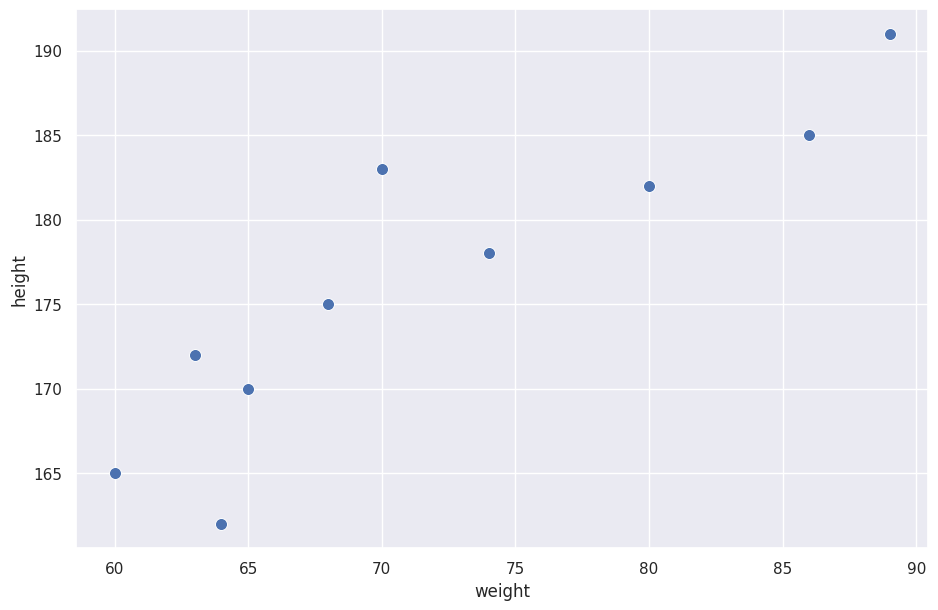

In [23]:
sns.scatterplot(data=data, x='weight', y='height', s=75) # s is diameter of the points
plt.show()

### A bit of theory

Dusting off some high school memories, the **equation of a straight line** is given by **$Y = b_{1}X + b_{0}$**:

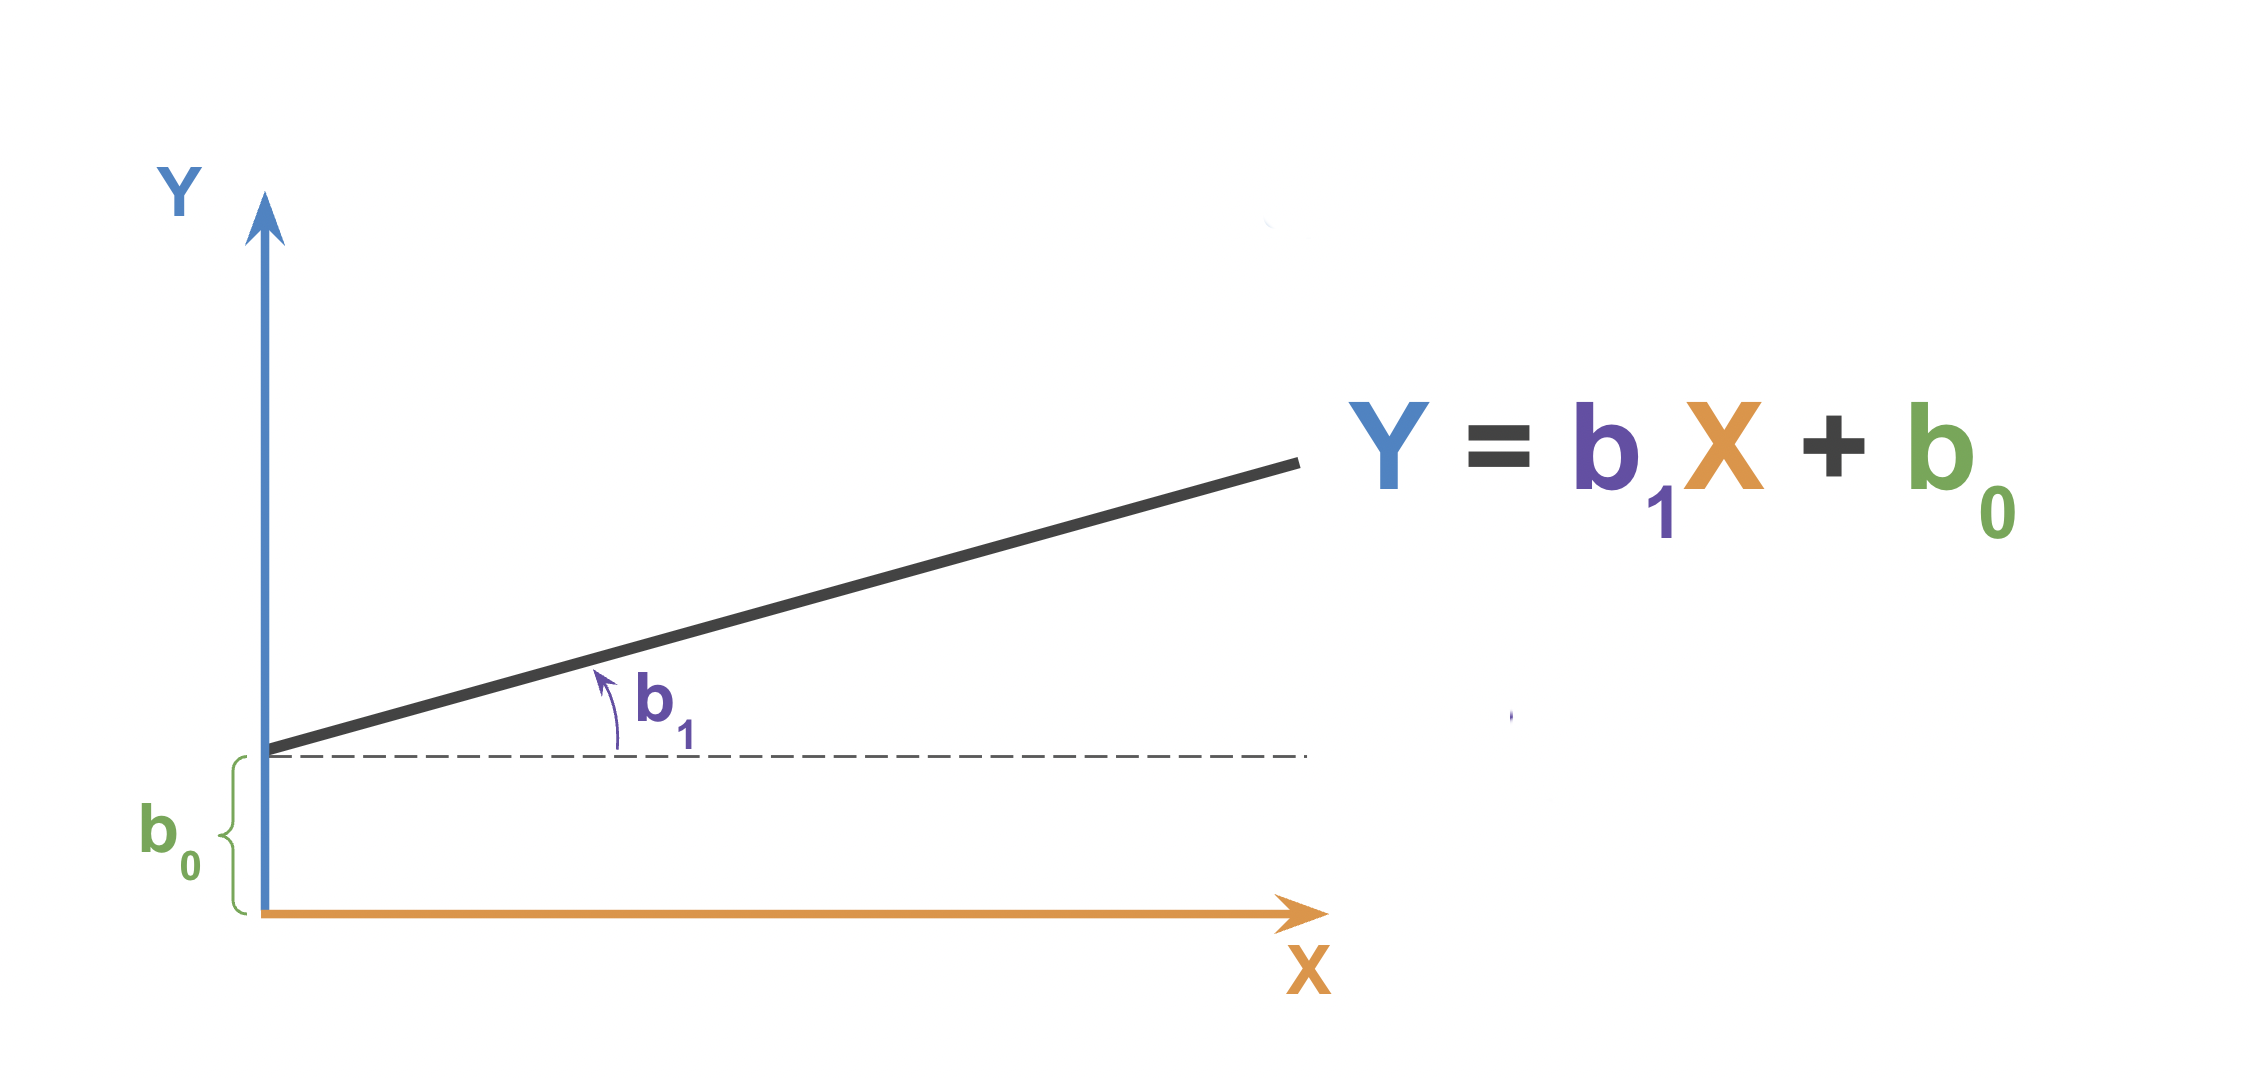


Y = `dependent variable or target`

$b_{1}$ = `weight or gradient`

X = `independent variables or regressors`

$b_{0}$ = `slope or bias`

So, as already mentioned, the goal of linear regression is to find the straight line equation that **best approximates** the point cloud (ie the data).

But what does "*the line that fits best*" mean? The central idea is that the distance of each point from the straight line (i.e. the error of our model) must be as short as possible and therefore, technically, we will have to look for the straight line that **minimizes the sum of the distances** between point and line (the red lines in the image below) squared.

<img src="https://raw.githubusercontent.com/boolean-data-analytics/img/main/on-demand/DAREG-min-sse.png" width="800">

> Let's get help from [this interactive site](https://mlu-explain.github.io/linear-regression/) to get a better insight than what we've seen so far.

### Practical application

Now let's see **how to build a linear regression model in Python** using our weight and height data. Specifically, we will create a model that, given the weight (independent or regressor variable) is able to predict the height (dependent or target variable) of a person.

The `sklearn` package contains modules that are right for us and, in a few lines of code, we will be able to create our model.

In [25]:
data.head() # to remind us of what our data looks like

,height,weight
0,175,68
1,170,65
2,172,63
3,185,86
4,165,60


In [26]:
# we import the library we will need to create the linear regression model
from sklearn.linear_model import LinearRegression

The `LinearRegression()` class allows us to instantiate a new `reg` object on which we then call the `.fit()` method passing it our data as input, i.e. the predictor `weight` (X) and the variable target `height` (Y).

> The `.values.reshape(-1, 1)` following the weight variable is a technical necessity to transform the X into a column vector. Find more information [here](https://www.alpharithms.com/reshaping-data-for-linear-regression-with-pandas-numpy-and-scikit-learn-033714/#scikit-learn-linearregression).

In [ ]:
# define and "fit" the linear regression model
reg = LinearRegression() # initialise the object
reg.fit(X = data['weight'],
         y = data['height'])

> 🫤❓ERROR: it is necessary to reform to the single variable 👇❗

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-29-52e385160f77> in <cell line: 3>()
      1 # define and "fit" the linear regression model
      2 reg = LinearRegression() # initialise the object
----> 3 reg.fit(X = data['weight'], # fit the model
      4          y = data['height'])

3 frames
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py in check_array(array, accept_sparse, accept_large_sparse, dtype, order, copy, force_all_finite, ensure_2d, allow_nd, ensure_min_samples, ensure_min_features, estimator, input_name)
    900             # If input is 1D raise error
    901             if array.ndim == 1:
--> 902                 raise ValueError(
    903                     "Expected 2D array, got 1D array instead:\narray={}.\n"
    904                     "Reshape your data either using array.reshape(-1, 1) if "

ValueError: Expected 2D array, got 1D array instead:
array=[68 65 63 86 60 70 80 89 74 64].


Reshape your data either using `array.reshape(-1, 1)` if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

> 🤓 When we input a variable to the `.fit` method we supply a row vector but `sklearn` (from sklearn.linear_model import `LinearRegression`) needs a column vector so it asks to transform the row vector into a column vector.

In [31]:
# define and "fit" the linear regression model
reg = LinearRegression() # initialise the object
reg.fit(X = data['weight'].values.reshape(-1, 1), # fit the model
         y = data['height'])

LinearRegression()

Done!✨ We have estimated a linear regression model!

At this point the `reg` object contains the estimates of the coefficients $b_{0}$ and $b_{1}$ of our model and we can extract them as follows:

In [33]:
reg.intercept_

117.47129212866398

In [34]:
reg.coef_

array([0.81820178])

In [40]:
# take off array([])
reg.coef_[0]

0.8182017784608627

In [41]:
# print the regression coefficients on the screen
print(f'Intercept (b0): {round(reg.intercept_, 2)}') # ,2 = rounded at 2nd decimal number
print(f'Coefficient (b1): {round(reg.coef_[0], 2)}') # ,2 = rounded at 2nd decimal number

Intercept (b0): 117.47
Coefficient (b1): 0.82


Our model equation is given by:

```
height = 0.82 * weight + 117.47
```

With the two coefficients $b_{0}$ and $b_{1}$ it is also possible to specify the regression line and superimpose it on our starting data.


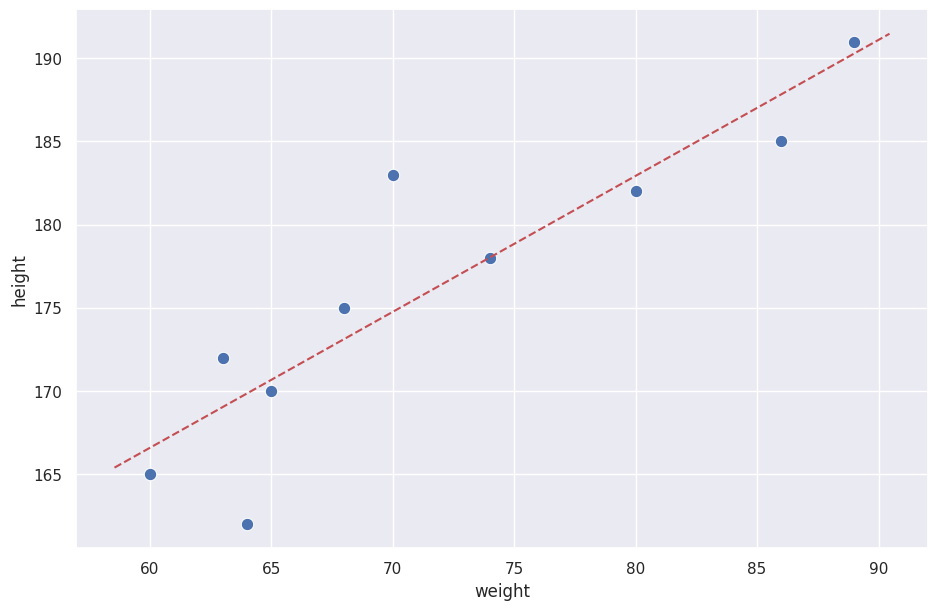

In [49]:
# let's go to graphically represent the straight line that identifies the model
# and overlay it on the point cloud of our data

# create scatterplot (same code above)
sns.scatterplot(x='weight', y='height', data=data, s = 80)

axes = plt.gca() # get current axes instance
x_vals = np.array(axes.get_xlim()) # create the data for the x axis
y_vals = reg.intercept_ + reg.coef_[0] * x_vals # create the data for the y axis
plt.plot(x_vals, y_vals, '--', color='r') # draw the line above the scatterplot_
# '--' to make the line dashed

plt.show()

So, if we were to meet a new person, **thanks to this model** we could **predict their height** as long as we know their weight.

For example, for a person weighing 73 kg, a height of

```
height = 0.82 * 73 + 117.47 = 177.33
```

It is also possible to use the `reg.coef_` and `reg.intercept_` coefficients directly to get a more precise estimate:

In [50]:
expected = reg.coef_[0] * 73 + reg.intercept_
print(f'Expected height: { round(expected, 2) }')

Expected height: 177.2


If instead of having just one weight observation for which we want to estimate height we had 5, we could use the `.predict()` method to get our predictions:

In [57]:
 x_prev = np.array([63, 67, 71, 82, 87])
 y_prev = reg.predict(x_prev.reshape(-1, 1))
 y_prev

array([169.01800417, 172.29081129, 175.5636184 , 184.56383796,
       188.65484685])

> a weight of 63 estimates a height of 169.1

> a weight of 67 estimates a height of 172.3 ...
